In [1]:
import os
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches  as mpatches
import matplotlib
import seaborn as sns
sns.set()

/usr/local/manual/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from lsst.sims.catalogs.generation.db import CatalogDBObject
from lsst.sims.catalogs.generation.db import CatalogDBObject

In [3]:
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catalogs.measures.instance import InstanceCatalog
from lsst.sims.utils import ObservationMetaData

Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values


In [4]:
from lsst.sims.catUtils.baseCatalogModels import GalaxyTileObj, GalaxyDiskObj
from lsst.sims.catUtils.baseCatalogModels import SNObj
from lsst.sims.catUtils.mixins import FrozenSNCat

In [5]:
s  = SNObj()

## ObsMetaData

In [6]:
from lsst.sims.catUtils.utils import ObservationMetaDataGenerator

In [7]:
degConv = np.array([1., 1./60., 1./3600.])
raConv = degConv / 24.0 * 360.
centralRA = np.dot(np.array([3., 32., 30]), raConv) #03h 32m 30s
centralDec = np.dot(np.array([-28, 6., 0.]), degConv)
patchRadius = 0.4 * np.sqrt(2) #np.dot(np.array([0.0, 10.0, 0.]), degConv)

In [8]:
opsimPath = os.path.join('/Users/rbiswas/data/LSST/OpSimData')
opsimDB = os.path.join(opsimPath,'enigma_1189_sqlite.db')

In [9]:
generator = ObservationMetaDataGenerator(driver='sqlite', database=opsimDB) #database = opsimPath, driver='sqlite')
obsMetaDataResults = generator.getObservationMetaData(limit=1000,
                                                      fieldRA=(centralRA - 2.0, centralRA + 2.0), 
                                                      fieldDec=(centralDec - 2.0, centralDec + 2.0),
                                                      expMJD=(49500., 49690.),
                                                      boundLength=0.05,
                                                      boundType='circle')

In [10]:
_ = [(obsMetaDataResults.index(x), x.mjd.TAI) for x in obsMetaDataResults if x.bandpass == 'r']

In [11]:
TwinklesObsMetaDataSmall = obsMetaDataResults[35]
TwinklesObsMetaDataSmall2 = obsMetaDataResults[145]
TwinklesObsMetaDataSmall3 = obsMetaDataResults[390]

In [12]:
print (TwinklesObsMetaDataSmall.pointingRA, TwinklesObsMetaDataSmall2.pointingRA, TwinklesObsMetaDataSmall3.pointingRA)

(53.009138473031555, 53.009138473031555, 53.009138473031555)


In [13]:
class TSNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'Tgaltileid','Tt0', 'Tx0', 'Tx1', 'Tc', 'Tredshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}

In [14]:
Ttsmall = TSNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)
Ttsmall.write_catalog('TTwinklesSN.dat')

In [15]:
TTSNdf = pd.read_csv('TTwinklesSN.dat', sep=',\s+')

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


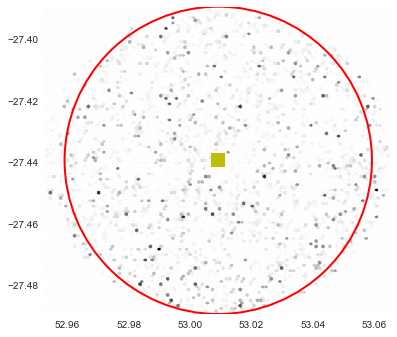

In [16]:
fig, ax = plt.subplots()
ax.hexbin(np.degrees(TTSNdf['#raJ2000']), np.degrees(TTSNdf.decJ2000))
ax.plot(TwinklesObsMetaDataSmall.pointingRA, TwinklesObsMetaDataSmall.pointingDec, 
         'ys', markersize=14)
circ = mpatches.Circle((TwinklesObsMetaDataSmall.pointingRA, TwinklesObsMetaDataSmall.pointingDec), 
         0.05)
circ.set(edgecolor='r', fill=False, lw=2)
#circ.set(face)
ax.add_artist(circ)
ax.set_aspect('equal')
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
#sns.despine()

##  SN Instance Catalogs

In [17]:
sncatalog = FrozenSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
                         column_outputs=['snra', 'galtileid', 'sndec', 'snid', 'x0', 't0', 'flux', 'flux_err', 'mag', 'mag_err',
                                         'TmagNorm', 'TsedFilepath', 'adu'])
sncatalog.surveyStartDate = 49500.
sncatalog.writeSedFile = False
sncatalog.prefix = '/Users/rbiswas/tmp/'

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)


In [18]:
sncatalog.suppressDimSN = True

In [19]:
start = time.time()
_ = sncatalog.write_catalog('newcat.dat', chunk_size=2000)
end = time.time()
print end -start

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1883)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1879)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1900)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 665)
56.2388999462


In [20]:
NoCalcCat = FrozenSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
                         column_outputs=['snra', 'galtileid', 'sndec', 'snid', 'x0', 't0'])
NoCalcCat.surveyStartDate = 49500.
NoCalcCat.writeSedFile = False
NoCalcCat.prefix = '/Users/rbiswas/tmp/'

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)


In [21]:
start = time.time()
_ = NoCalcCat.write_catalog('nocalculations.dat', chunk_size=2000)
end = time.time()
print end -start

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1874)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1882)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1902)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 669)
6.52486109734


In [22]:
!wc -l newcat.dat
#!wc -l newcat2.dat
#!wc -l newcat3.dat

     393 newcat.dat


In [23]:
OnlyPhoSim = FrozenSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
                         column_outputs=['snra', 'galtileid', 'sndec', 'snid', 'x0', 't0',
                                         'TmagNorm', 'TsedFilepath'])
OnlyPhoSim.surveyStartDate = 49500.
OnlyPhoSim.writeSedFile = False
OnlyPhoSim.prefix = '/Users/rbiswas/tmp/'

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)


In [24]:
start = time.time()
_ = OnlyPhoSim.write_catalog('onlyPhosimCalcs.dat', chunk_size=2000)
end = time.time()
print end -start

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1872)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1890)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1899)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 666)
8.46256518364


In [25]:
OnlyPhoSim.writeSedFile = True
start = time.time()
_ = OnlyPhoSim.write_catalog('onlyPhosimCalcs.dat', chunk_size=2000)
end = time.time()
print end -start

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1871)
('writing file to ', '/Users/rbiswas/tmp/specFile_6000274614100_49612.3383_r.dat')
('writing file to ', '/Users/rbiswas/tmp/specFile_6000606050501_49612.3383_r.dat')
('writing file to ', '/Users/rbiswas/tmp/specFile_6000018451007_49612.3383_r.dat')
('writing file to ', '/Users/rbiswas/tmp/specFile_6000091709107_49612.3383_r.dat')
('writing file to ', '/Users/rbiswas/tmp/specFile_6000777478400_49612.3383_r.dat')
('writing file to ', '/Users/rbiswas/tmp/specFile_6000972229700_49612.3383_r.dat')
('writing file to ', '/Users/rbiswas/tmp/specFile_6000167058301_49612.3383_r.dat')
('writing file to ', '/Users/rbiswas/tmp/specFile_6000134534807_49612.3383_r.dat')
('writing file to ', '/Users/rbiswas/tmp/specFile_6000134534803_49612.3383_r.dat')
('writing file to ', '/Users/rbiswas/tmp/specFile_6000166844111_49

##  PhoSim Instance Catalogs

In [26]:
from lsst.sims.catUtils.exampleCatalogDefinitions.phoSimCatalogExamples import PhoSimCatalogSN, PhoSimCatalogSersic2D

In [27]:
pc = PhoSimCatalogSN(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, column_outputs=['EBV'])
pc.writeSedFile = True
pc.surveyStartDate = 49500
pc.suppressDimSN = True

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)


In [28]:
start = time.time()
pc.write_catalog('SNOnlyPhoSimCatalog.dat')
end = time.time()
print end - start

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 6327)
('writing file to ', 'specFile_6000134534807_49612.3383_r.dat')
('writing file to ', 'specFile_6000134534803_49612.3383_r.dat')
('writing file to ', 'specFile_6000166844111_49612.3383_r.dat')
('writing file to ', 'specFile_6000202198804_49612.3383_r.dat')
('writing file to ', 'specFile_6001080913807_49612.3383_r.dat')
('writing file to ', 'specFile_6000163765100_49612.3383_r.dat')
('writing file to ', 'specFile_6000562083903_49612.3383_r.dat')
('writing file to ', 'specFile_6000350025005_49612.3383_r.dat')
('writing file to ', 'specFile_6001552130005_49612.3383_r.dat')
('writing file to ', 'specFile_6000132061801_49612.3383_r.dat')
('writing file to ', 'specFile_6000054794501_49612.3383_r.dat')
('writing file to ', 'specFile_6001275441101_49612.3383_r.dat')
('writing file to ', 'specFile_6000210509202_

## Read in the SN instance Catalog

In [29]:
sncatdf = pd.read_csv('newcat.dat', sep=',', float_precision='high')

In [30]:
sncatdf.rename(columns={x:x.strip().strip('#') for x in sncatdf.columns}, inplace=True)

In [31]:
sncatdf.head()

,snid,snra,sndec,z,t0,c,x1,x0,galtileid,flux,flux_err,mag,mag_err,TmagNorm,TsedFilepath,adu
0,6000134534807,0.924901,-0.479660,0.8308,49634.4989,-0.004487,0.4750,0.000003,60001345348,3.573123e-11,3.602404e-11,26.1174,7.570312e-01,51.2035,/Users/rbiswas/tmp/specFile_6000134534807_496...,103.4994
1,6000134534803,0.924901,-0.479660,0.8308,49622.7228,0.142884,-1.3618,0.000002,60001345348,4.205507e-11,3.603722e-11,25.9405,6.719931e-01,26.3066,/Users/rbiswas/tmp/specFile_6000134534803_496...,121.8171
2,6000166844111,0.924963,-0.479732,0.8669,49575.7365,-0.003971,-0.7924,0.000003,60001668441,1.391120e-11,3.597856e-11,27.1416,1.386626e+00,27.1689,/Users/rbiswas/tmp/specFile_6000166844111_496...,40.2953
3,6000202198804,0.925073,-0.479665,0.8573,49583.0608,0.055133,-0.5496,0.000002,60002021988,1.411520e-11,3.597898e-11,27.1258,1.375260e+00,26.8265,/Users/rbiswas/tmp/specFile_6000202198804_496...,40.8862
4,6001080913807,0.925130,-0.479707,0.7744,49531.5629,0.152381,1.8306,0.000003,60010809138,5.433218e-12,3.596087e-11,28.1624,2.204709e+00,26.9168,/Users/rbiswas/tmp/specFile_6001080913807_496...,15.7379


In [32]:
# Fix the types
sncatdf['snid'] = sncatdf.snid.astype(int)
#sncatdf.set_index('snid', inplace=True)
names = [x for x in sncatdf.columns]; 
for name in ['snid', 'galtileid', 'TsedFilepath']:
    names.remove(name)

In [33]:
sncatdf['DeltaT'] = sncatalog.mjdobs - sncatdf['t0']

In [34]:
sncatdf[names] = sncatdf[names].astype(np.float)

In [35]:
sncatdf['SNR'] = sncatdf.flux / sncatdf.flux_err
sncatdf.head()

,snid,snra,sndec,z,t0,c,x1,x0,galtileid,flux,flux_err,mag,mag_err,TmagNorm,TsedFilepath,adu,DeltaT,SNR
0,6000134534807,0.924901,-0.479660,0.8308,49634.4989,-0.004487,0.4750,0.000003,60001345348,3.573123e-11,3.602404e-11,26.1174,0.757031,51.2035,/Users/rbiswas/tmp/specFile_6000134534807_496...,103.4994,-22.160604,0.991872
1,6000134534803,0.924901,-0.479660,0.8308,49622.7228,0.142884,-1.3618,0.000002,60001345348,4.205507e-11,3.603722e-11,25.9405,0.671993,26.3066,/Users/rbiswas/tmp/specFile_6000134534803_496...,121.8171,-10.384504,1.166990
2,6000166844111,0.924963,-0.479732,0.8669,49575.7365,-0.003971,-0.7924,0.000003,60001668441,1.391120e-11,3.597856e-11,27.1416,1.386626,27.1689,/Users/rbiswas/tmp/specFile_6000166844111_496...,40.2953,36.601796,0.386652
3,6000202198804,0.925073,-0.479665,0.8573,49583.0608,0.055133,-0.5496,0.000002,60002021988,1.411520e-11,3.597898e-11,27.1258,1.375260,26.8265,/Users/rbiswas/tmp/specFile_6000202198804_496...,40.8862,29.277496,0.392318
4,6001080913807,0.925130,-0.479707,0.7744,49531.5629,0.152381,1.8306,0.000003,60010809138,5.433218e-12,3.596087e-11,28.1624,2.204709,26.9168,/Users/rbiswas/tmp/specFile_6001080913807_496...,15.7379,80.775396,0.151087


####  Some Sanity Checks

In [67]:
sncatdf['logaduByflux'] = np.log10(sncatdf.adu/sncatdf.flux)

In [68]:
brightobjects = sncatdf.query('SNR > 1')

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


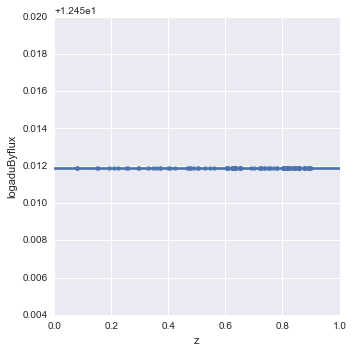

In [69]:
sns.lmplot("z", 'logaduByflux', data=brightobjects)

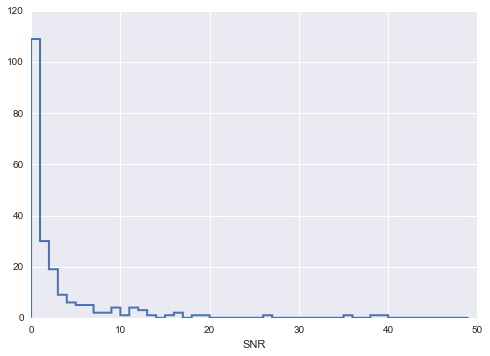

In [70]:
fig, ax = plt.subplots()
sncatdf.SNR.hist(bins=np.arange(0., 50., 1.), histtype='step', lw=2., alpha=1., ax=ax)
ax.set_xlabel('SNR')

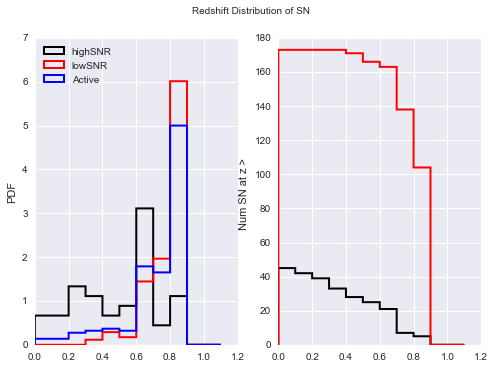

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2);
_ = ax[0].hist(sncatdf.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=True,
               label='highSNR')
_ = ax[0].hist(sncatdf.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
             normed=True, label='lowSNR')
_ = ax[0].hist(sncatdf.query('SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='b', 
             normed=True, label='Active')
ax[0].grid(True)
_ = ax[1].hist(sncatdf.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=False, 
               cumulative=-1)
_ = ax[1].hist(sncatdf.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
               normed=False, cumulative=-1)
_ = ax[1].grid(True)
_ = ax[0].legend(loc='upper left')
_ = ax[0].set_ylabel('PDF')
_ = ax[1].set_ylabel('Num SN at z > ')
_ = fig.suptitle('Redshift Distribution of SN')

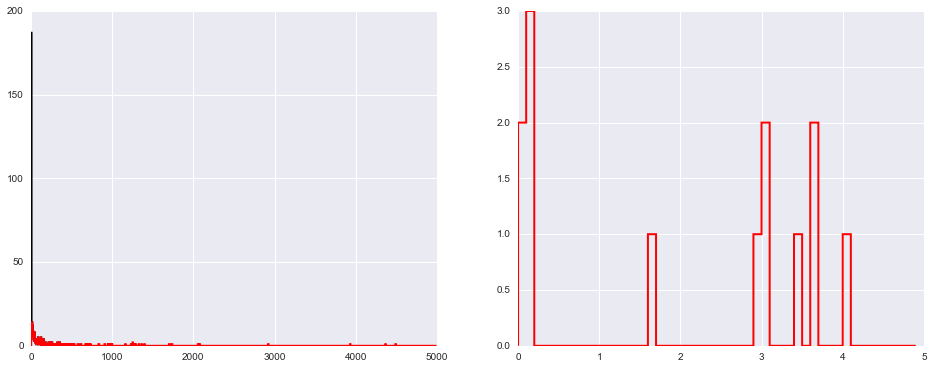

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
_ = ax[0].hist(sncatdf.adu, bins=np.arange(0, 500, 5), histtype='step', alpha=1, lw=2., color='k')
_ = ax[0].hist(sncatdf.adu.replace({0:np.nan}).dropna(), bins=np.arange(0, 5000, 5), histtype='step', 
               alpha=1, lw=2., color='r')
_ = ax[1].hist(sncatdf.adu.replace({0:np.nan}).dropna(), bins=np.arange(0, 5, 0.1), histtype='step', 
               alpha=1, lw=2., color='r')

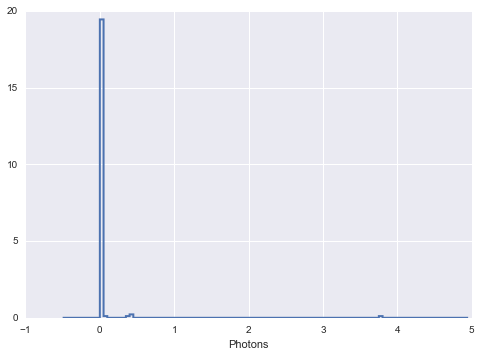

In [73]:
fig, ax = plt.subplots()
sncatdf.adu.apply(lambda x: x* 2.3).hist(bins=np.arange(-0.5, 5., 0.05), histtype='step', lw=2., alpha=1., ax=ax, 
                                         normed=1)
ax.set_xlabel('Photons')

### Read in the phosim Outputs

In [74]:
phosimOuta = pd.read_csv('/Users/rbiswas/soft/phosim_release/testout/centroid_lsst_e_203482_R22_S11_E000.txt', 
                         float_precision='high', sep='\s+')
phosimOutb = pd.read_csv('/Users/rbiswas/soft/phosim_release/testout/centroid_lsst_e_203482_R22_S11_E001.txt', 
                         float_precision='high', sep='\s+')

In [75]:
phosimOuta.SourceID = phosimOuta.SourceID.astype('int')
phosimOutb.SourceID = phosimOutb.SourceID.astype('int')
phosimOuta.set_index('SourceID', inplace=True)
phosimOutb.set_index('SourceID', inplace=True)
phosimOuta.Photons += phosimOutb.Photons

In [76]:
phosimOuta.head()

,Photons,AvgX,AvgY
SourceID,,,
6144281204838442,10,1450.285714,2598.428571
6144620595713066,0,NaN,NaN
6144018893831210,0,NaN,NaN
6144093910125610,14,1533.250000,2602.875000
6144796137881642,0,NaN,NaN


Set the same index for sncatdf

In [77]:
sncatdf['SourceID'] = np.left_shift(sncatdf.snid, 10) + 42
sncatdf.set_index('SourceID', inplace=True)

In [78]:
sncatdf['Photons'] = phosimOuta.Photons

In [79]:
sncatdf.head()

,snid,snra,sndec,z,t0,c,x1,x0,galtileid,flux,flux_err,mag,mag_err,TmagNorm,TsedFilepath,adu,DeltaT,SNR,logaduByflux,Photons
SourceID,,,,,,,,,,,,,,,,,,,,
6144137763642410,6000134534807,0.924901,-0.479660,0.8308,49634.4989,-0.004487,0.4750,0.000003,60001345348,3.573123e-11,3.602404e-11,26.1174,0.757031,51.2035,/Users/rbiswas/tmp/specFile_6000134534807_496...,103.4994,-22.160604,0.991872,12.46189,0
6144137763638314,6000134534803,0.924901,-0.479660,0.8308,49622.7228,0.142884,-1.3618,0.000002,60001345348,4.205507e-11,3.603722e-11,25.9405,0.671993,26.3066,/Users/rbiswas/tmp/specFile_6000134534803_496...,121.8171,-10.384504,1.166990,12.46189,121
6144170848369706,6000166844111,0.924963,-0.479732,0.8669,49575.7365,-0.003971,-0.7924,0.000003,60001668441,1.391120e-11,3.597856e-11,27.1416,1.386626,27.1689,/Users/rbiswas/tmp/specFile_6000166844111_496...,40.2953,36.601796,0.386652,12.46189,19
6144207051575338,6000202198804,0.925073,-0.479665,0.8573,49583.0608,0.055133,-0.5496,0.000002,60002021988,1.411520e-11,3.597898e-11,27.1258,1.375260,26.8265,/Users/rbiswas/tmp/specFile_6000202198804_496...,40.8862,29.277496,0.392318,12.46189,31
6145106855738410,6001080913807,0.925130,-0.479707,0.7744,49531.5629,0.152381,1.8306,0.000003,60010809138,5.433218e-12,3.596087e-11,28.1624,2.204709,26.9168,/Users/rbiswas/tmp/specFile_6001080913807_496...,15.7379,80.775396,0.151087,12.46189,23


In [80]:
sncatdf['ratio'] = sncatdf.adu / sncatdf['Photons']

In [81]:
sncatdf.head()

,snid,snra,sndec,z,t0,c,x1,x0,galtileid,flux,...,mag,mag_err,TmagNorm,TsedFilepath,adu,DeltaT,SNR,logaduByflux,Photons,ratio
SourceID,,,,,,,,,,,,,,,,,,,,,
6144137763642410,6000134534807,0.924901,-0.479660,0.8308,49634.4989,-0.004487,0.4750,0.000003,60001345348,3.573123e-11,...,26.1174,0.757031,51.2035,/Users/rbiswas/tmp/specFile_6000134534807_496...,103.4994,-22.160604,0.991872,12.46189,0,inf
6144137763638314,6000134534803,0.924901,-0.479660,0.8308,49622.7228,0.142884,-1.3618,0.000002,60001345348,4.205507e-11,...,25.9405,0.671993,26.3066,/Users/rbiswas/tmp/specFile_6000134534803_496...,121.8171,-10.384504,1.166990,12.46189,121,1.006753
6144170848369706,6000166844111,0.924963,-0.479732,0.8669,49575.7365,-0.003971,-0.7924,0.000003,60001668441,1.391120e-11,...,27.1416,1.386626,27.1689,/Users/rbiswas/tmp/specFile_6000166844111_496...,40.2953,36.601796,0.386652,12.46189,19,2.120805
6144207051575338,6000202198804,0.925073,-0.479665,0.8573,49583.0608,0.055133,-0.5496,0.000002,60002021988,1.411520e-11,...,27.1258,1.375260,26.8265,/Users/rbiswas/tmp/specFile_6000202198804_496...,40.8862,29.277496,0.392318,12.46189,31,1.318910
6145106855738410,6001080913807,0.925130,-0.479707,0.7744,49531.5629,0.152381,1.8306,0.000003,60010809138,5.433218e-12,...,28.1624,2.204709,26.9168,/Users/rbiswas/tmp/specFile_6001080913807_496...,15.7379,80.775396,0.151087,12.46189,23,0.684257


In [82]:
sncatdf.query('ratio == 0.').SNR.max()

nan

In [83]:
def makeaComparisonPlot(sncatdf):
    fig, ax = plt.subplots(2, 2, sharey=True, **{'figsize':(16,12)})
    _ = ax[0,0].hist(sncatdf.ratio, bins=np.arange(0, 5., 0.05), histtype='step', lw=2., color='k', label='adu/Photons')
    ax[0,0].axvline(1/2.3, **{'color':'b', 'ls':'dashed', 'label':'invgain'})
    ax[0,0].legend(loc='best')
    ax[0,1].hist(sncatdf.query('adu < 1.0e-10 and Photons > 0').Photons, histtype='step', normed=False, 
                 cumulative=True, lw=2., color='k', bins=np.arange(0., 200., 10))
    ax[0,0].set_xlabel('Adu/Num Photons')
    _ = ax[1,0].hist(sncatdf.Photons/sncatdf.adu, bins=np.arange(0, 5., 0.05), histtype='step', lw=2., color='k',
                     label='Photons/adu')
    ax[1,0].axvline(2.3, **{'color':'b', 'ls':'dashed', 'label':'gain'})
    ax[1,0].legend(loc='best')
    ax[1,0].set_xlabel('Num Photons/Adu')
    
    _ = ax[1,1].hist(sncatdf.query('adu > 1.0e-10 and Photons == 0').adu, histtype='step', normed=False, 
                     cumulative=True, lw=2., color='k', bins=np.arange(0., 200., 10))

    return fig

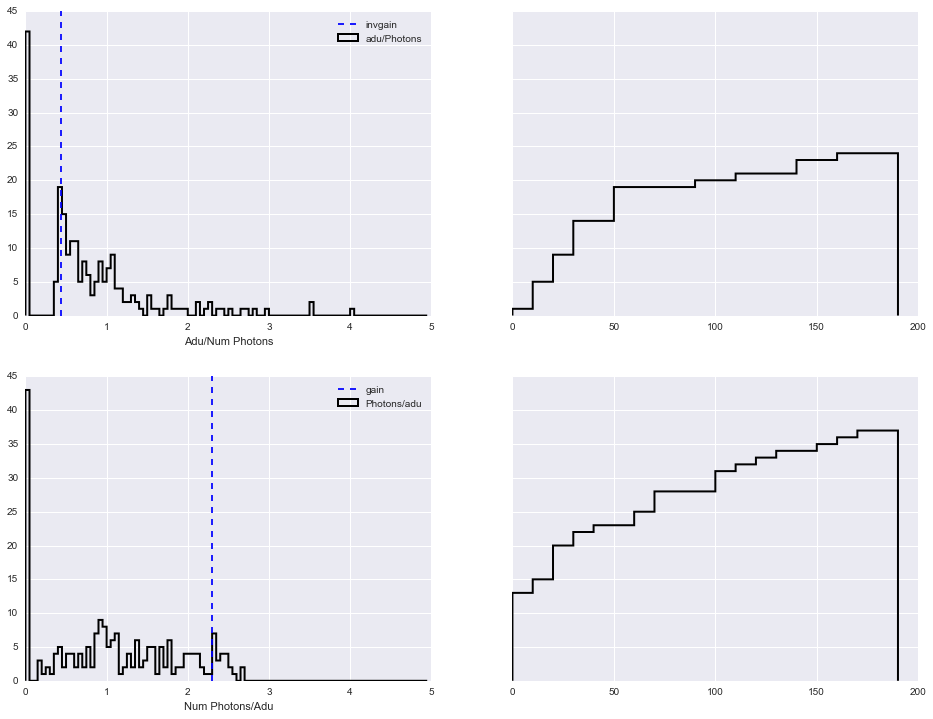

In [84]:
_ = makeaComparisonPlot(sncatdf)

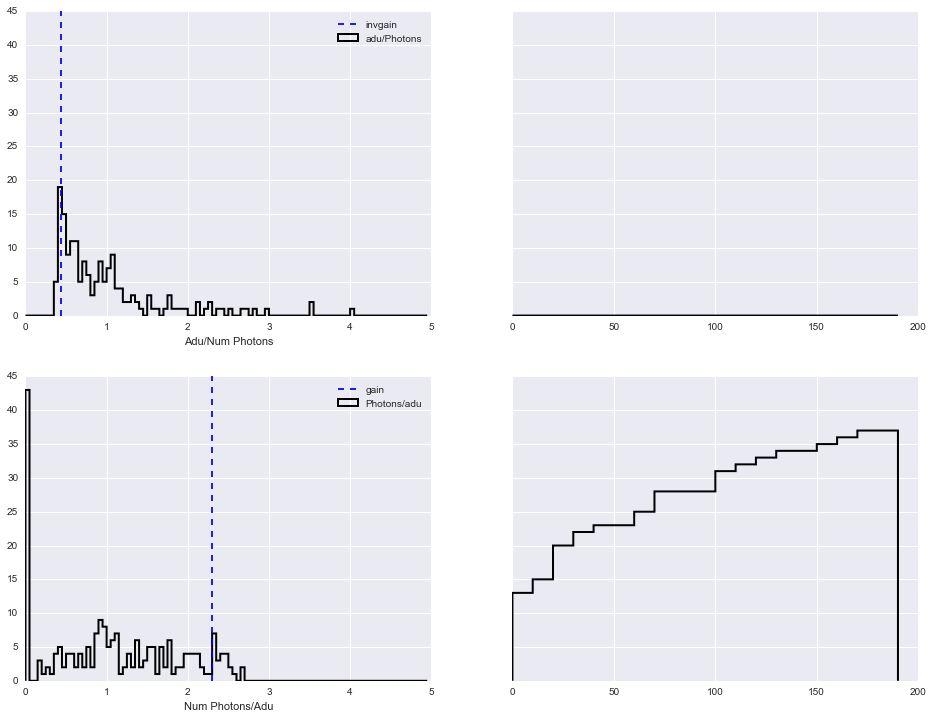

In [85]:
_ = makeaComparisonPlot(sncatdf.query('SNR > 0.'))

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


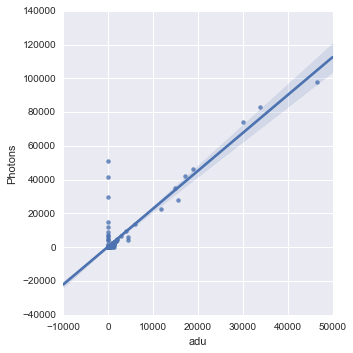

In [89]:
sns.lmplot("adu", 'Photons', data=sncatdf)

In [91]:
sncatdf['estimatedAdu'] = sncatdf.Photons / 2.3

In [94]:
sncatdf['residAdu'] = sncatdf.estimatedAdu - sncatdf.adu

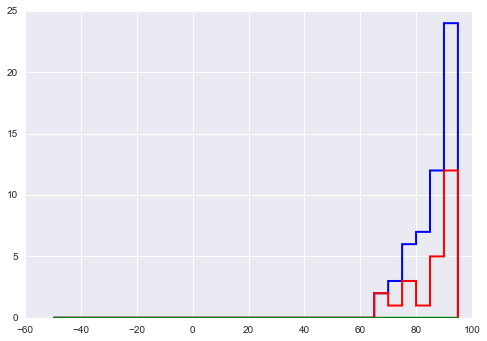

In [173]:
sncatdf.query('adu < 0.0001 and Photons >0').DeltaT.hist(**{'color':'b', 'lw':2, 'histtype':'step', 
                                                                 'bins':np.arange(-50, 100, 5), 'cumulative':1 })
sncatdf.query('adu < 0.0001 and Photons > 3').DeltaT.hist(**{'color':'r', 'lw':2, 'histtype':'step',
                                                                  'bins':np.arange(-50, 100, 5) })
sncatdf.dropna().query('adu <0.0001 and Photons > 30').DeltaT.hist(**{'color':'g', 'lw':2, 'histtype':'step',
                                                                   'bins':np.arange(-50, 100, 5) })

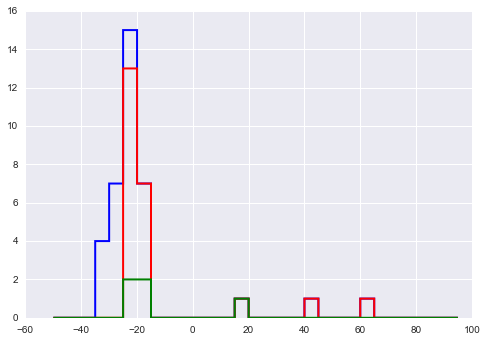

In [143]:
sncatdf.dropna().query('Photons ==0 and adu > 3').DeltaT.hist(**{'color':'b', 'lw':2, 'histtype':'step', 
                                                                 'bins':np.arange(-50, 100, 5) })
sncatdf.dropna().query('Photons ==0 and adu > 30').DeltaT.hist(**{'color':'r', 'lw':2, 'histtype':'step',
                                                                  'bins':np.arange(-50, 100, 5) })
sncatdf.dropna().query('Photons ==0 and adu > 300').DeltaT.hist(**{'color':'g', 'lw':2, 'histtype':'step',
                                                                   'bins':np.arange(-50, 100, 5) })

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


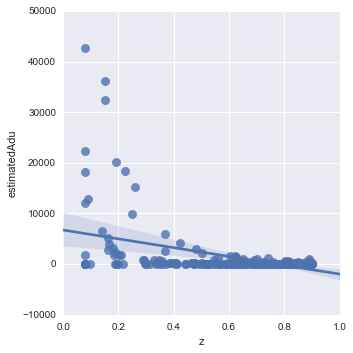

In [96]:
sns.lmplot("z", 'estimatedAdu', data=sncatdf, scatter_kws={"s": 80})

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


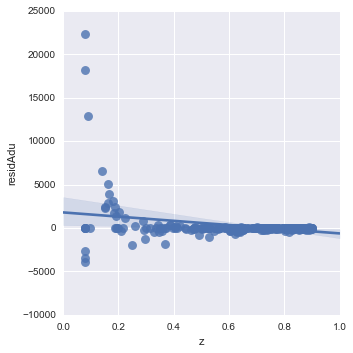

In [109]:
sns.lmplot("z", 'residAdu', data=sncatdf, scatter_kws={"s": 80})

# Scratch

In [87]:
phosimOuta.SourceID.min()

AttributeError: 'DataFrame' object has no attribute 'SourceID'

In [ ]:
phosimOutb = pd.read_csv('/Users/rbiswas/soft/phosim_release/output/centroid_lsst_e_203482_R22_S11_E001.txt', sep='\s+')

In [ ]:
phosimOuta.Photons = phosimOuta.Photons + phosimOutb.Photons

In [ ]:
phosimOuta['SourceID'] = phosimOuta.SourceID.astype(int)

In [ ]:
phosimOuta['snid'] = np.right_shift(phosimOuta['SourceID'], 10)

In [ ]:
phosimOuta.set_index('snid', inplace=True)

In [ ]:
sncatdf.adu.min()

In [ ]:
sncatdf['ratio'] = sncatdf.adu / phosimOuta.Photons

In [ ]:
sncatdf['Photons'] = phosimOuta.Photons

In [ ]:
sncatdf.query('ratio == 0.')

In [ ]:
fig, ax = plt.subplots()
sns.distplot(sncatdf.ratio.replace([-np.inf, np.inf],np.nan).dropna(), bins=np.arange(0.0, 5., 0.05), 
             rug_kws=False,kde=False, norm_hist=False).set_xlim(0,)
sns.distributions()
#ax.hist(df.ratio.replace([-np.inf, np.inf],np.nan).dropna() ,bins=np.arange(0., 5, 0.05))
ax.axvline(1./2.3, color='k', **{'label':'1/gain', 'linestyle':'dashed'})
ax.set_xlabel('adu/Photons')
ax.legend(loc='best')

In [ ]:
rv = poisson(mu=1)

In [ ]:
x = np.arange(0, 10)

In [ ]:
plt.plot(x, rv.pmf(x), 'bo')

In [ ]:
plt.hist(sncatdf.Photons / sncatdf.adu / 2.3, np.arange(-0.5,5.5), histtype='step')
plt.plot()

In [ ]:
plt.plot(poisson.pmf)

In [ ]:
df.query('ratio > 1000.')[['adu', 'Photons', 'flux', 'DeltaT', 'mag', 'mag_err', 'flux_err']]

In [ ]:
x = df.query('ratio ==0.').Photons.copy(deep=True)

In [ ]:
x.sort(ascending=False); x

In [ ]:
fig.savefig('invGain.png')

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
print len(df.query('ratio > 10000')), df.query('ratio > 10000').ratio.unique()
print len(df.query('ratio < -10000')), df.query('ratio < -10000').ratio.unique()

In [ ]:
df.query('ratio >500.').adu 

In [ ]:
_df = df.query('ratio == 0.')
_dff = df.query('ratio < 0.')
_ = plt.hist(_df.DeltaT / (_df.z + 1.), bins=np.arange(-30, 70., 1.), histtype='step', color='b', alpha=1., lw=2.)
_ = plt.hist(_dff.DeltaT / (_dff.z + 1.), bins=np.arange(-30, 70., 1.), histtype='step', color='r', alpha=1., lw=2.)
plt.axvline(-20., color='k')
plt.axvline(50., color='k')

In [ ]:
_df = df[['z', 'ratio']].replace([-np.inf, np.inf], [-20., 200.]).dropna()
#sns.jointplot(_df.z, _df.ratio, kind='kde')
plt.plot(_df.z, _df.ratio, 'o')

In [ ]:
adus = df.adu.dropna().sum()
photons = phosimOuta.replace([np.inf],np.nan).Photons.dropna().sum()

In [ ]:
photons / adus

In [ ]:
active = df.query('SNR > 0.').replace([np.inf],np.nan).dropna().ratio
bright = df.query('SNR > 5.').replace([np.inf],np.nan).dropna().ratio

In [ ]:
s = 0.05
plt.hist(active, color='r', bins=np.arange(0., 25, s), histtype='step', label='SNR>0', lw=2)
plt.hist(bright, color='k', bins=np.arange(0., 25, s), histtype='step', label='SNR>5', lw=2)
plt.legend(loc='best')
plt.axvline(1./2.3)
plt.xlim(0, 5)

In [ ]:
import lsst.afw.image as afwi

In [ ]:
img0 = afwi.ImageF('/Users/rbiswas/soft/phosim_release/output/lsst_e_203482_f2_R22_S11_E000.fits.gz')
img1 = afwi.ImageF('/Users/rbiswas/soft/phosim_release/output/lsst_e_203482_f2_R22_S11_E001.fits.gz')

In [ ]:
arr0 = img0.getArray()
arr1 = img1.getArray()

In [ ]:
arr = arr0 + arr1
electrons = arr.sum()

In [ ]:
adus  = df.adu.dropna().sum()

In [ ]:
2.3 / np.sqrt(2)

In [ ]:
electrons / adus

In [ ]:
x.replace([-np.inf, np.inf], np.nan, inplace=True)

In [ ]:
x.dropna().hist()

In [ ]:
df.set_index('snid', inplace=True)

In [ ]:
x.dropna()

In [ ]:
df.index.size

In [ ]:
phosimOuta.index.dtype

In [ ]:
6145532174336041 in df.index.values

In [ ]:
df.iat[6145532174336041]

In [ ]:
phosimOuta['snid']  = phosimOuta.index.values

In [ ]:
phosimOuta['snid'] = np.right_shift(phosimOuta['snid'], 10)

In [ ]:
phosimOuta.set_index('snid', inplace=True)

In [ ]:
phosimOuta['adu']/ phosimOuta['Photons']

In [ ]:
phosimOuta.head()

In [ ]:
df.index.min()

In [ ]:
phosimOuta.index.min()

In [ ]:
np.left_shift(6000000189404,10) < phosimOuta.index.min()

In [ ]:
np.right_shift(np.left_shift(6000000189404,10),10)

In [ ]:
id(None)

In [ ]:
x  = None

In [ ]:
id(x)

In [ ]:
y = None

In [ ]:
xx =3

In [ ]:
yy  = 3

In [ ]:
 == y

In [ ]:
x is y

In [ ]:
id(xx)

In [ ]:
id(yy)

# Scratch

In [ ]:
names = s.get_column_names()

for key in names:
    if 'snra' in names[key]:
        print key

print names['TwinkSN']

In [ ]:
class SNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'galtileid','t0', 'x0', 'x1', 'c', 'redshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}
                        #'x0':'%8e', 'x1':'%8e', 'c':'%8e', 't0':'%8e'}
        
